<a href="https://colab.research.google.com/github/yoondaeng/ICE4104-AI-Applications/blob/main/Lab5_supervised_learning_and_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Linear Regression

## 1.1. Limitation of K-NN

**분류(classification)**는 샘플을 몇 개의 클래스 중 하나로 분류하는 문제

**회귀(regression)**는 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제

농어라는 새로운 데이터를 가지고 농어의 길이만으로 무게를 예측해봅시다.

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

먼저 이 데이터가 어떤 형태를 띠고 있는지 산점도를 그려 봅시다.

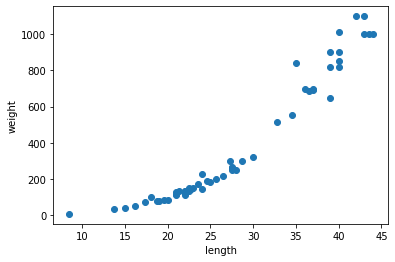

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

농어 데이터를 머신러닝 모델에 사용하기 전에 훈련 세트와 테스트 세트로 나누겠습니다.

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다.
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

Scikit-learn에 사용할 훈련 세트는 2차원 배열이어야 합니다. 지난 시간까지는 2개의 특성을 사용했기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용했습니다.

이번 예제에서는 길이 특성 1개만 사용하기 때문에 수동으로 2차원 배열을 만들어야 합니다. 넘파이 배열은 크기를 바꿀 수 있는 **reshape()** method를 제공합니다.

예를 들어, (4,) 배열을 (2,2) 크기로 바꿔 봅시다.

In [ ]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [ ]:
# test_array가 (4,) 배열인 것을 확인했으니 이제 (2,2) 크기로 바꿔 보겠습니다.
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [ ]:
# -1을 넣으면 자동으로 맞춰줌
# test_array.reshape(2, -1)은 test_array.reshape(2, 2)와 같음

이제 reshape()을 사용해 train_input과 test_input을 2차원 배열로 바꾸겠습니다.

넘파이는 배열의 크기를 자동으로 지정하는 기능도 제공 합니다. 크기에 **-1**을 지정하면 나머지 원소 개수로 모두 채우라는 의미입니다.

여기서는 train_input 배열의 전체 원소 개수가 42개 이므로, train_input.reshape(-1, 1)을 하면 배열의 크기가 (42, 1)이 됩니다.

In [ ]:
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


이제 준비한 훈련 세트를 활용해 K-NN 알고리즘을 훈련시켜 봅시다. 최근접 이웃 개수를 3으로 하는 모델을 훈련합니다.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

########## code yourself ##########


###################################

KNeighborsRegressor(n_neighbors=3)

이 모델을 사용해 길이가 50cm인 농어의 무게를 예측해보겠습니다.

In [ ]:
########## code yourself ##########



[1033.33333333]


모델은 50cm 농어의 무게를 1,033g 정도로 예측했습니다. 하지만 실제 이 농어의 무게는 훨씬 더 많이 나간다고 합니다.

무엇이 잘못 되었는지 확인해보기 위해 훈련 세트와 50cm 농어, 그리고 이 농어의 최근접 이웃을 산점도에 표시하겠습니다.

In [ ]:
import matplotlib.pyplot as plt

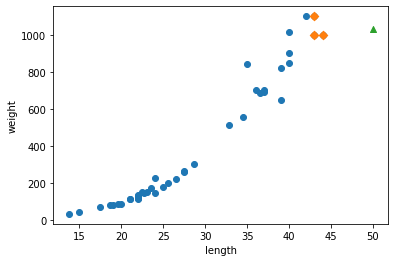

In [ ]:
# 50cm 농어의 이웃을 구합니다.
########## code yourself ##########



# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

길이가 50cm이고 무게가 1,033g인 농어는 초록색 삼각형으로 표시되고, 그 주변의 샘플은 주황색 다이아몬드 모양으로 표시됩니다.

이 산점도를 보면 길이가 커질수록 농어의 무게가 증가하는 경향이 있습니다.

하지만 50cm 농어에서 가장 가까운 것은 45cm 근방이기 때문에 K-NN 알고리즘은 이 샘플들의 무게를 평균합니다.

이웃 샘플의 타깃의 평균을 구해 봅시다.

In [ ]:
########## code yourself ##########


1033.3333333333333


모델이 예측했던 값과 정확히 일치합니다. K-NN 회귀는 가장 가까운 샘플을 찾아 타깃을 평균합니다.

따라서, 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있습니다.

예를 들어, 길이가 100cm인 농어도 여전히 1,033g으로 예측합니다.

In [ ]:
 print(knr.predict([[100]]))

[1033.33333333]


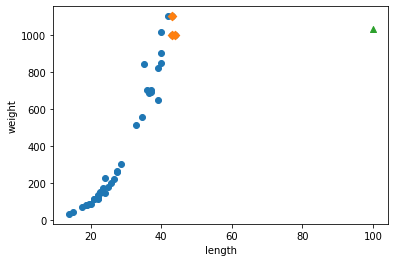

In [ ]:
# 100cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이런 식이면 농어가 아무리 커도 무게가 더 늘어나지 않을 것입니다.

이 문제를 해결하기 위해 선형 회귀(linear regression) 알고리즘을 사용해 봅시다.

## 1.2. Linear Regression

실제 현상이 어떻게 움직이는지는 알 수 없다 (신의 영역)

하지만 현상을 "근사"하는 모형을 제안할 수는 있다.

**회귀분석의 격언 : All models are wrong. Some are useful**

**선형 회귀(linear regression)**는 널리 사용되는 대표적인 회귀 알고리즘입니다.

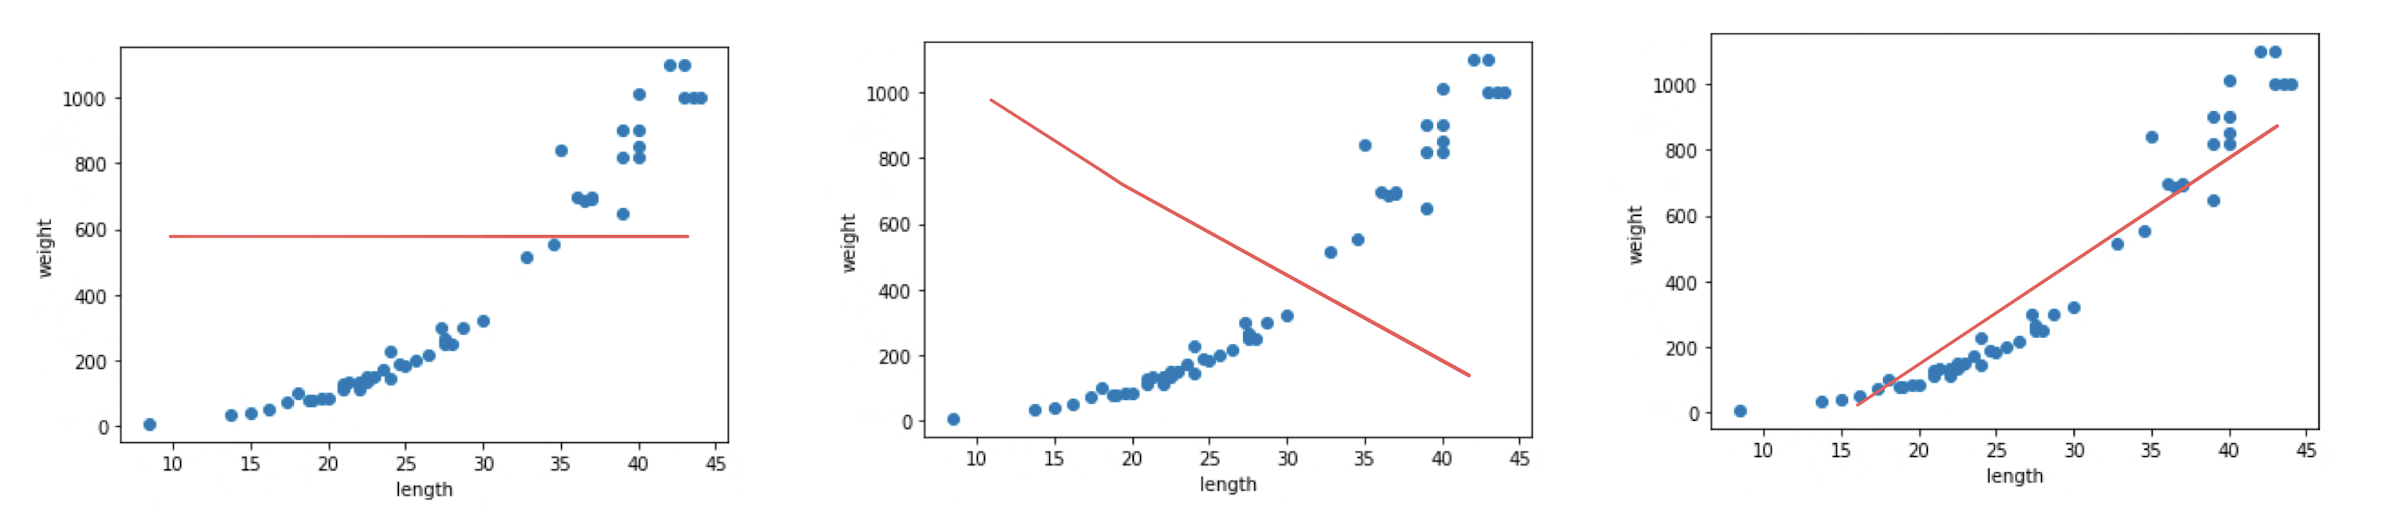

Scikit-learn은 sklearn.linear_model 패키지 아래에 **LinearRegression** 클래스로 선형 회귀 알고리즘을 구현해 놓았습니다. 이 클래스의 객체를 만들어 훈련하겠습니다.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [ ]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


K-NN 회귀를 사용했을 때와 달리, 선형 회귀는 50cm 농어의 무게를 아주 높게 예측했습니다. 이 선형 회귀가 학습한 직선을 그려 보고 어떻게 이런 값이 나왔는지 알아봅시다.

하나의 직선을 그리려면 y = ax + b 처럼 쓸 수 있습니다. 여기에서 x를 농어의 길이, y를 농어의 무게로 바꾸면 다음과 같습니다.

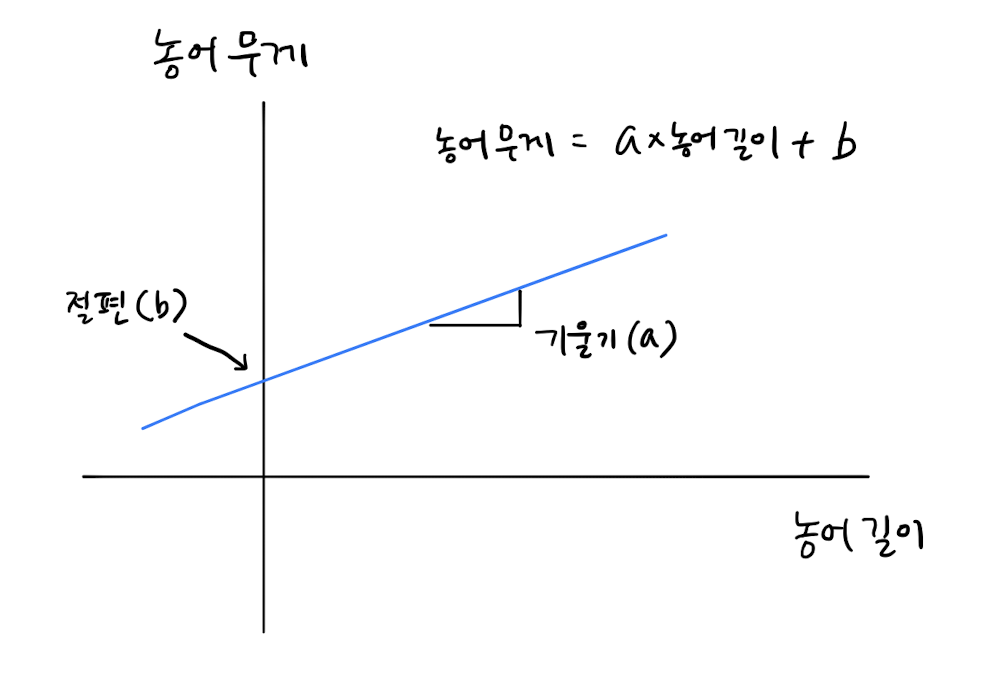

그렇다면 LinearRegression 클래스가 이 데이터에 가장 잘 맞는 a와 b를 찾았다고 볼 수 있습니다.

LinearRegression 클래스가 찾은 a와 b는 **lr 객체의 coef_와 intercept_** 속성에 저장되어 있습니다.

In [ ]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477




참고로, coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 의미로 **모델 파라미터(model parameter)**라고 부릅니다. 대부분 사용하는 많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같습니다. 이를 **모델 기반 학습**이라고 부릅니다.

앞서 실습한 K-NN에는 모델 파라미터가 없습니다. 훈련 세트를 저장하는 것이 훈련의 전부였습니다. 이를 **사례 기반 학습**이라고 부릅니다.

이제 농어의 길이 15에서 50까지 직선으로 그려 봅시다.

이 직선을 그리려면 앞에서 구한 기울기와 절편을 사용해 (15, 15x39-709)와 (50x 50x39-709) 두 점을 이으면 됩니다.

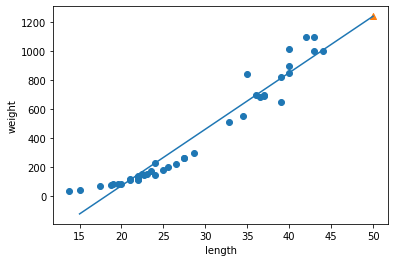

In [ ]:
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

위 직선이 선형 회귀 알고리즘이 이 데이터셋에서 찾은 최적의 직선입니다. 길이가 50cm인 농어에 대한 예측은 직선의 연장선에 있습니다.

훈련 세트와 테스트 세트에 대한 점수를 확인해 봅시다. 여기서 점수는 이전 분류에서의 점수와는 조금 다릅니다. 분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율로 정확도라고 불렀습니다.

하지만, 회귀에서는 정확한 숫자를 맞힌다는 것은 거의 불가능합니다. 회귀의 경우에는 조금 다른 값으로 평가하는데, 이 점수를 **결정계수(coefficient of determination)**라고 부릅니다. 또는 간단히 R^2라고도 부릅니다.

이 값은 다음과 같은 식으로 계산됩니다.

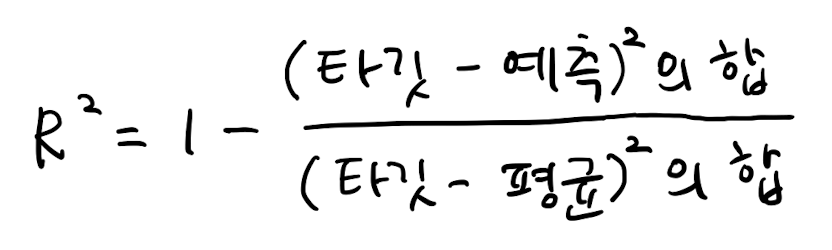

다시 돌아와서, 훈련 세트와 테스트 세트에 대한 R^2 점수를 확인하겠습니다.

In [ ]:
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target))   # 테스트 세트

0.939846333997604
0.8247503123313558


훈련 세트와 테스트 세트의 점수가 조금 차이가 나는 것을 볼 수 있습니다.

만약 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 모델이 훈련 세트에 **과대적합(overfitting)**되었다고 말합니다.

반대로, 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 낮은 경우는 모델이 훈련 세트에 **과소적합(underfitting)**되었다고 말합니다. 즉, 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우입니다.

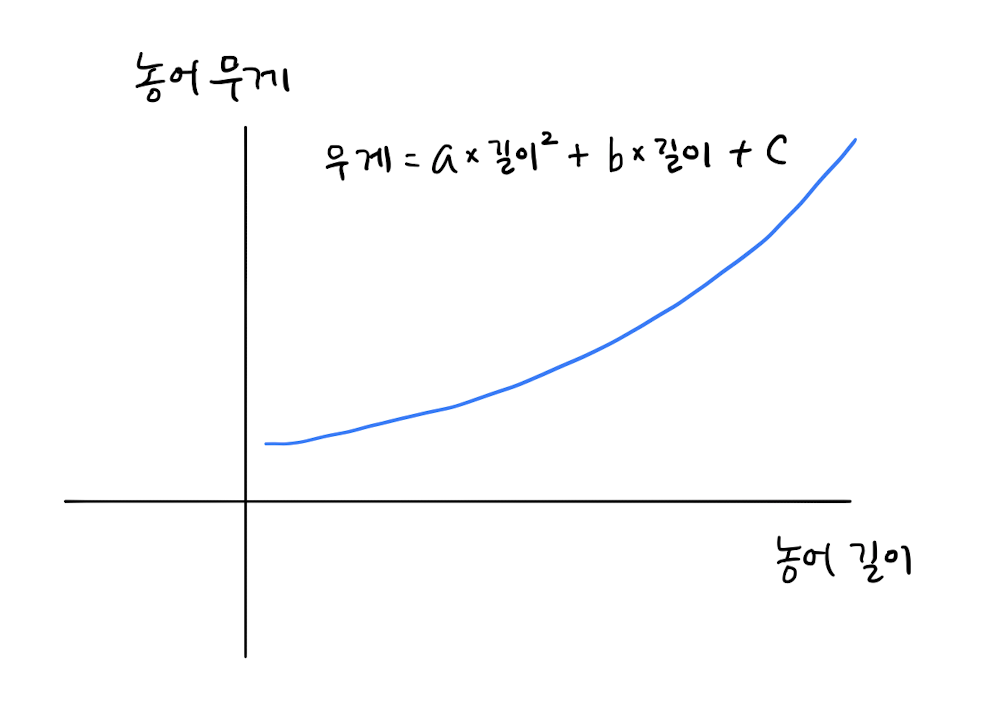

## 1.3. Polynomial Regression

위와 같은 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 합니다.

다음처럼 농어의 길이를 제곱해서 원래 데이터 앞에 붙여 보겠습니다.


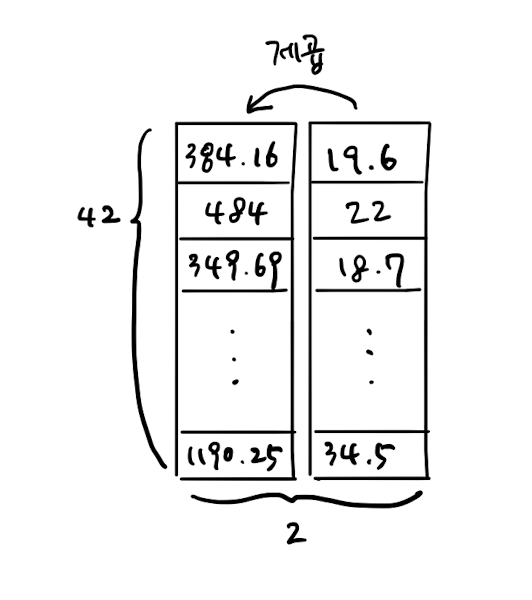

**column_stack()** 함수를 사용하면 간단하게 만들 수 있습니다.

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


원래 특성인 길이를 제곱하여 왼쪽 열에 추가했기 때문에 훈련 세트와 테스트 세트 모두 열이 2개로 늘어났습니다.

이제 train_poly를 사용해 선형 회귀 모델을 다시 훈련한 다음 50cm짜리 농어에 대해 무게를 예측해 봅시다.

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


이전에 예측한 1,241g보다 더 높은 값을 예측했습니다. 이 모델이 훈련한 계수와 절편을 출력해봅시다.

In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


결국, 이 모델은 다음과 같은 그래프를 학습했습니다.

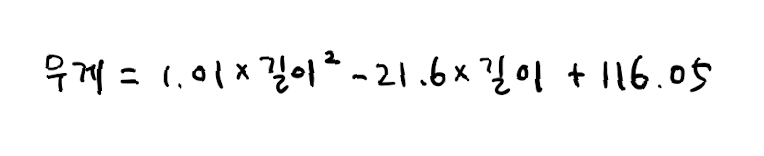

이런 방정식을 다항식(polynomial)이라 부르며, 다항식을 사용한 선형 회귀를 **다항 회귀(polynomial regression**)라고 부릅니다.

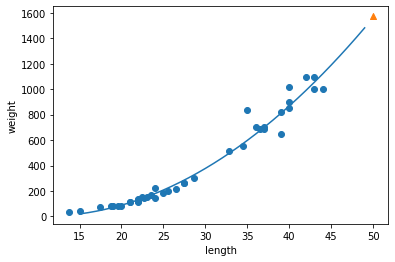

In [ ]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다.
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

앞선 단순 선형 회귀 모델보다 훨씬 나은 그래프가 그려졌습니다.

그럼 훈련 세트와 테스트 세트의 R^2 점수를 평가해봅시다.

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


훈련 세트와 테스트 세트에 대한 점수가 크게 높아졌습니다.

# 2.Logistic Regression

## 2.1. Data Preparation

**판다스(pandas)**는 유명한 데이터 분석 라이브러리입니다.

**데이터프레임(dataframe)**은 판다스의 핵심 데이터 구조입니다. 넘파이 배열과 비슷하게 다차원 배열을 다룰 수 있지만 훨씬 더 많은 기능을 제공합니다.

판다스를 이용해 데이터를 인터넷에서 내려받아 데이터프레임에 저장하겠습니다. 그다음 넘파이 배열로 변환해 모델을 훈련해봅시다.

판다스 데이터프레임을 만들기 위해 많이 사용하는 파일은 CSV 파일입니다. CSV 파일은 다음 그림처럼 콤마로 나누어져 있는 텍스트 파일입니다.


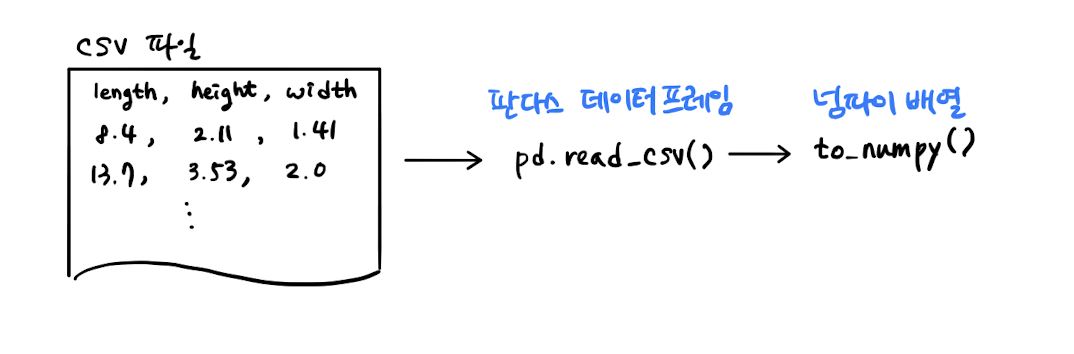

판다스의 read_csv() 함수로 CSV 파일을 데이터프레임으로 변환한 다음, **head()** method로 처음 5개 행을 출력해 보겠습니다.

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


어떤 종류의 생선이 있는지 Species 열에서 고유한 값을 추출해 보겠습니다.

판다스의 **unique()** 함수를 사용하면 간단합니다.

In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


이 데이터프레임에서 Species 열을 타깃으로 만들고 나머지 5개 열은 입력 데이터로 사용하겠습니다. 데이터프레임에서 열을 선택하는 방법은 데이터프레임에서 원하는 열을 리스트로 나열하면 됩니다.

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

데이터프레임에서 여러 열을 선택하면 새로운 데이터프레임이 반환됩니다. 이를 **to_numpy()** method로 넘파이 배열로 바꾸어 fish_input에 저장했습니다.

fish_input에 5개의 특성이 잘 저장되었는지 처음 5개 행을 출력해 봅시다.

In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


앞의 fish 데이터프레임을 출력한 값과 비교했을 때 동일한 값을 가지는 것을 확인할 수 있습니다.

이제 동일한 방식으로 타깃 데이터를 만들겠습니다.

In [ ]:
fish_target = fish['Species'].to_numpy()

이제 데이터를 훈련 세트와 테스트 세트로 나눕니다.

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

Scikit-learn의 **StandardScaler** 클래스를 사용해 훈련 세트와 테스트 세트를 표준화 전처리하겠습니다.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

필요한 데이터를 모두 준비했으니, 이제 K-NN 분류기로 테스트 세트에 들어 있는 확률을 예측해 보겠습니다.

## 2.2. Probability Prediction of K-NN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


앞서 fish 데이터프레임에서 7개의 생선이 있었습니다. 타깃 데이터를 만들 때 fish['Species']를 사용해 만들었기 때문에 훈련 세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어가 있습니다.

이렇게 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 **다중 분류(multi-class classification)**라고 부릅니다.

이진 분류를 사용했을 때는 양성 클래스와 음성 클래스를 각각 1과 0으로 지정하여 타깃 데이터를 만들었습니다. 다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만 Scikit-learn에서는 편리하게도 문자열로 된 타깃값을 그대로 사용할 수 있습니다.

이때 주의할 점은 타깃값을 그대로 Scikit-learn 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨지므로, pd.unique(fish['Species'])로 출력했던 순서와 다릅니다.

KNeighborsClassifier에서 정렬된 타깃값은 **classes_** 속성에 저장되어 있습니다.

In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


'Bream'이 첫 번째 클래스, 'Parkki'가 두 번째 클래스가 되는 식입니다.

테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측해 보겠습니다.

In [ ]:
########## code yourself ##########
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


이 5개 샘플에 대한 예측은 어떤 확률로 만들어졌을까요? Scikit-learn의 분류 모델은 **predict_proba()** method로 클래스별 확률값을 반환합니다.

테스트 세트에 있는 처음 5개의 샘플에 대한 확률을 출력해 봅시다.

넘파이 **round()** 함수는 기본으로 소수점 첫째 자리에서 반올림 하는데, **decimals** 매개변수로 유지할 소수점 아래 자릿수를 지정할 수 있습니다.

In [ ]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))  # 소수점 네 번째 자리까지 표기, 다섯 번째 자리에서 반올림.

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


predict_proba() method의 출력 순서는 classes_속성과 같습니다. 즉, 첫 번째 열이 'Bream'에 대한 확률, 두 번째 열이 'Parkki'에 대한 확률입니다.

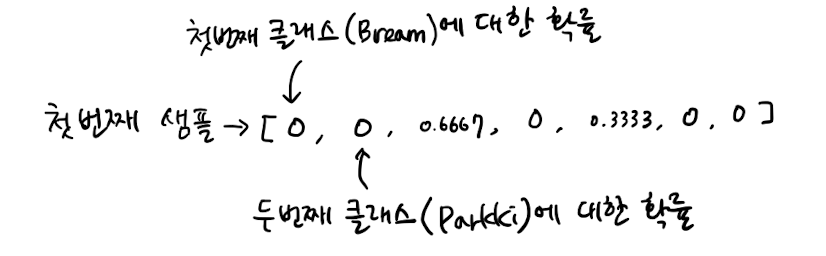

이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인해 보기 위해, 네 번째 샘플의 최근접 이웃의 클래스를 확인해 보겠습니다.

In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


이 샘플의 이웃은 다섯 번째 클래스인 'Roach'가 1개이고 세 번째 클래스인 'Perch'가 2개입니다.

따라서, 다섯 번째 클래스에 대한 확률은 1/3 = 0.3333이고 세 번째 클래스에 대한 확률은 2/3 = 0.6667이 됩니다. 앞서 출력한 네 번째 샘플의 클래스 확률과 같습니다.

## 2.3. Logistic Regression

**로지스틱 회귀(logistic regression)**는 이름은 회귀이지만 분류 모델입니다. 이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습합니다. 예를 들면 다음과 같습니다.

image.png

여기에서 a, b, c, d, e는 가중치 혹은 계수입니다. 특성은 늘어났지만 다중 회귀를 위한 선형 방정식과 같습니다. z는 어떤 값도 가능합니다.

하지만 확률이 되려면 0 ~ 1(또는 0~100%) 사이 값이 되어야 합니다. z가 아주 큰 음수일 때 0이 되고, z가 아주 큰 양수일 때 1이 되도록 바꾸려면 **시그모이드 함수(sigmoid function) = 로지스틱 함수(logistic function)**를 사용하면 됩니다.

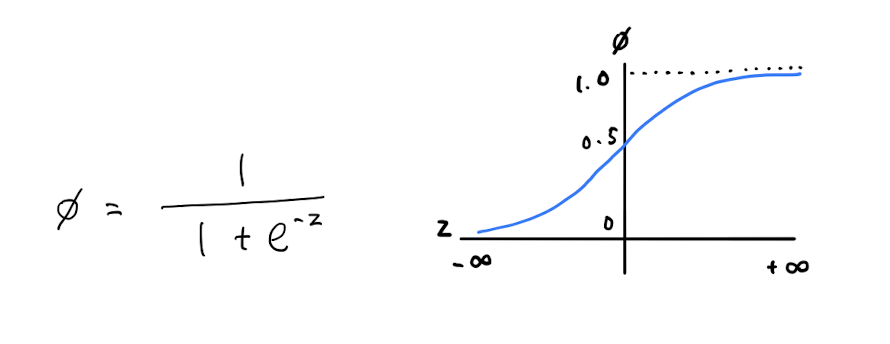

왼쪽의 식이 시그모이드 함수입니다. 선형 방정식의 출력 의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취합니다. 그럼 오른쪽과 같은 그래프를 만들 수 있습니다.

z가 어떤 값이 되더라도 𝜙는 절대로 0 ~ 1 사이의 범위를 벗어날 수 없습니다. 그렇다면 0 ~ 1 사이 값을 0 ~ 100%까지 확률로 해석할 수 있습니다.

넘파이를 사용하면 그래프를 간단하게 그릴 수 있습니다.

-5와 5 사이에 0.1 간격으로 배열 z를 만든 다음, z 위치마다 시그모이드 함수를 계산합니다. 지수 함수 계산은 **np.exp()** 함수를 사용합니다.

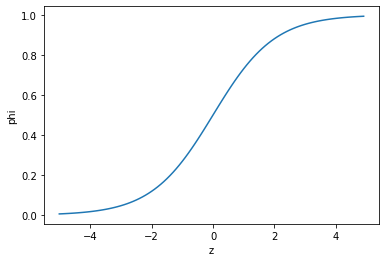

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 2.3.1. Perform Binary Classification with Logistic Regression

훈련하기 전에 간단한 이진 분류를 수행해 보겠습니다. 이진 분류일 경우, 시그모이드 함수의 출력이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단합니다.

그럼 먼저 도미와 빙어 2개를 사용해서 이진 분류를 수행해 보겠습니다.

**불리언 인덱싱(boolean indexing)**을 사용하여 넘파이 배열에서 True, False 값을 전달해 행을 선택합니다.

다음과 같이 'A'에서 'E'까지 5개의 원소로 이루어진 배열이 있을 때, 'A'와 'C'만 골라내려면 첫 번째와 세 번째 원소만 True이고 나머지 원소는 모두 False인 배열을 전달하면 됩니다.

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


이와 같은 방식을 사용해, 훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내봅시다.

비교 연산자를 사용하면 도미와 빙어의 행을 모두 True로 만들 수 있습니다. 예를 들어, 도미인 행을 골라내려면 train_target=='Bream'과 같이 씁니다. 이 비교식은 train_target 배열에서 'Bream'인 것은 True이고 그 외는 모두 False인 배열을 반환합니다.

도미와 빙어에 대한 비교 결과를 비트 OR 연산자(|)를 사용해 합치면 도미와 빙어에 대한 행만 골라낼 수 있습니다.

In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

bream_semlt_indexes 배열은 도미와 빙어일 경우 True이고 그 외는 모두 False 값이 들어가 있습니다. 따라서, 이 배열을 사용해 train_scaled와 train_target 배열에 불리언 인덱싱을 적용하면 손쉽게 도미와 빙어 데이터만 골라낼 수 있습니다.

이제 이 데이터로 로지스틱 회귀 모델을 훈련해 보겠습니다. LogisticRegression 클래스는 선형 모델이므로, sklearn.linear_model 패키지 아래 있습니다.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플을 예측해 봅시다.

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


두 번째 샘플을 제외하고는 모두 도미로 예측했습니다. KNeighborsClassifier와 마찬가지로 예측 확률은 predict_proba() method에서 제공합니다.

train_bream_smelt에서 처음 5개 샘플의 예측확률을 출력해보겠습니다.

In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


샘플마다 2개의 확률이 출력되었습니다. 첫 번째 열이 음성 클래스(0)에 대한 확률이고 두 번째 확률이 양성 클래스(1)에 대한 확률입니다.

그럼 Bream과 Smelt 중에 어떤 것이 양성 클래스일까요?

K-NN 분류기에서 봤듯이 Scikit-learn은 타깃값을 알파벳순으로 정렬하여 사용합니다. classes_ 속성에서 확인해 봅시다.

In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


빙어(Smelt)가 양성 클래스인 것을 확인할 수 있습니다.

선형 회귀에서처럼 로지스틱 회귀가 학습한 계수를 확인해 봅시다.

In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


따라서 이 로지스틱 회귀 모델이 학습한 방정식은 다음과 같습니다.

image.png

확실히 로지스틱 회귀는 선형 회귀와 매우 비슷한 것을 볼 수 있습니다.

LogisticRegression 클래스는 **decision_function()** method로 z 값을 출력할 수 있습니다.

train_bream_smelt의 처음 5개 샘플의 z 값을 출력해 봅시다.

In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


이 z 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있습니다.

파이썬의 Scipy 라이브러리에도 시그모이드 함수인 **expit()**가 있습니다. np.exp() 함수를 사용해 분수 계산을 하는 것보다 훨씬 편리하고 안전합니다.

decisions 배열의 값을 확률로 변환해 봅시다.

In [ ]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


출력된 값을 보면 predict_proba() method 출력의 두 번째 열의 값과 동일합니다. 즉, decision_function() method는 양성 클래스에 대한 z 값을 반환합니다.

### 2.3.2. Perform Multiple Classification with Logistic Regression

이제 이진 분류의 경험을 바탕으로 7개의 생선을 분류하는 다중 분류 문제를 수행해 봅시다.

LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용합니다. **max_iter** 매개변수에서 반복 횟수를 지정하며 기본값은 100입니다.

여기에 준비한 데이터셋을 사용해 모델을 훈련하면 반복 횟수가 부족하다는 경고가 발생합니다. 충분하게 훈련시키기 위해 반복 횟수를 1,000으로 늘리겠습니다.

또 LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제합니다. 이런 규제를 L2 규제라고도 부릅니다.

LogisticRegression에서 규제를 제어하는 매개변수는 C입니다. C가 작을수록 규제가 커지며, C의 기본값은 1입니다. 여기에서는 규제를 조금 완화하기 위해 20으로 늘리겠습니다.

이제 LogisticRegression 클래스로 다중 분류 모델을 훈련해봅시다. 7개의 생선 데이터가 모두 들어 있는 train_scaled와 train_target을 사용했습니다.

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


테스트 세트의 처음 5개 샘플에 대한 예측을 출력해 봅시다.

In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


이번에는 테스트 세트의 처음 5개 샘플에 대한 예측 확률을 출력해 보겠습니다. 출력을 간소하게 하기 위해 소수점 네 번째 자리에서 반올림하겠습니다.

In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


첫 번째 샘플을 보면 세 번째 열의 확률이 84.1%로 가장 높습니다. 세 번째 열이 농어(Perch)에 대한 확률인지 classes_ 속성에서 클래스 정보를 확인해 봅시다.

In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


세 번째 열이 농어(Perch)에 대한 확률이 맞았습니다. 두 번째 샘플은 여섯 번째 열인 Smelt를 가장 높은 확률(94.6%)로 예측했습니다.

다중 분류일 경우, 선형 방정식은 어떤 모습일까요? coef_와 intercept_ 의 크기를 출력해 봅시다.

In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


이 데이터는 5개의 특성을 사용하므로 coef_ 배열의 열은 5개입니다. 그런데 행이 7이고 intercept_도 7개나 있습니다. 이진 분류에서 보았던 z를 7개나 계산한다는 의미입니다. 즉, 다중 분류는 클래스마다 z 값을 하나씩 계산합니다. 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 됩니다.

이진 분류에서 확률은 시그모이드 함수를 사용해 z를 0과 1 사이의 값으로 변환했습니다. 다중 분류는 이와 달리, **소프트맥스(softmax)** 함수를 사용해 7개의 z 값을 확률로 변환합니다.

소프트맥스 계산 방식은 다음과 같습니다.

먼저 7개의 z 값의 이름을 z1에서 z7이라고 붙이겠습니다. z1 ~ z7까지 값을 사용해 지수 함수 e^{z1} ~ e^{z7}을 계산해 모두 더합니다. 이를 e_sum이라고 하겠습니다. (e_sum = e^{z1} + e^{z2} + .. + e^{z7})

그다음 e^{z1} ~ e^{z7}을 각각 e_sum으로 나누어 주면 됩니다.

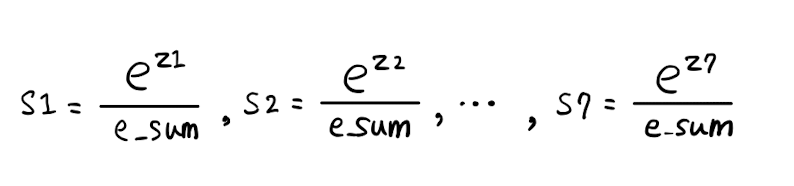

s1에서 s7까지 모두 더하면 분자와 분모가 같아지므로 1이 됩니다.

그럼 이진 분류에서처럼 decision_function() method로 z1 ~ z7까지의 값을 구한 다음 소프트맥스 함수를 사용해 확률로 바꾸어 보겠습니다.

먼저 테스트 세트의 처음 5개 샘플에 대한 z1 ~ z7의 값을 구해 봅시다.

In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


Scipy에서 제공하는 softmax() 함수를 import해 사용합니다.

In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


앞서 구한 decision 배열을 softmax() 함수에 전달했습니다. softmax()의 axis 매개변수는 소프트맥스를 계산할 축을 지정합니다. 여기에서는 axis=1로 지정하여 각 행, 즉 각 샘플에 대해 소프트맥스를 계산합니다. 만약 axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산합니다.

출력 결과가 앞서 구한 proba 배열과 비교하면 결과가 정확히 일치하는 것을 볼 수 있습니다.